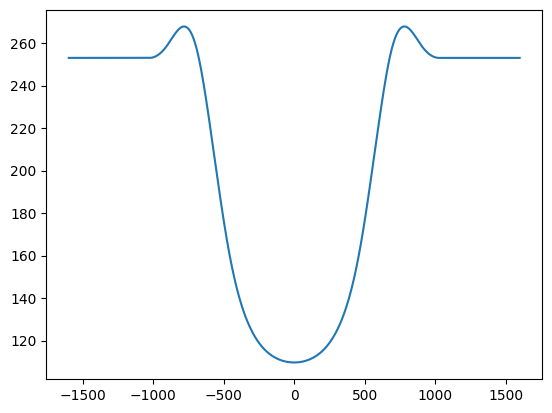

In [17]:
import matplotlib.pyplot as plt

def cavityShape(x, crater_width):
    return (x**2) / crater_width
def floorShape(floorheight):
    return floorheight
def rimShape(x, rim_width, rim_steepness, rim_height, crater_width):
    z = abs(x) - 1 - rim_width
    z /= crater_width
    if x > rim_width:
        return rim_height
    return rim_steepness * z * z + rim_height

def smoothMin(a, b, k):
    h = max(k - abs(a - b), 0) / k
    return min(a, b) - h * h * h * k / 6
def smoothMax(a, b, k):
    return -smoothMin(-a, -b, k)

# Plot the crater
def crater_height(distance, crater_width):
    h = cavityShape(distance, crater_width)
    return h
def rim_height(distance, crater_width):
    h = rimShape(distance, 256, 16, 250, crater_width / 2)
    return h
def floor_height(crater_width):
    return floorShape(crater_width)

def crater_shape(x, crater):
    distance = abs(x - crater["x"]) / 4
    crater_width = crater["width"]
    h = crater_height(distance, crater_width)
    h = smoothMin(h, rim_height(distance, crater_width), 256)
    h = smoothMax(h, floor_height(crater_width), 256)
    return h

def get_crater_at(x, y=0):
    ret = {
        "crater": False,
        "width": 100,
        "rim_width": 256,
        "x": x,
        "y": y
    }
    # if noise.snoise2(x, y, octaves=6, persistence=0.5, lacunarity=2.0, base=0) > 0.5:
    ret["crater"] = True
    return ret

# Function to get the height of a point based on crater distance
example_crater = get_crater_at(0)
crater_width = example_crater["width"]

# Plot the crater
x = [i for i in range(-crater_width*16, crater_width*16+1)]
y1 = [crater_shape(i, example_crater) for i in x]

# Plot each as a line
plt.plot(x, y1, label="Cavity")
